In [23]:
#0.Tai va su dung pandas
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [24]:
#1.Doc du lieu tu dataset quang cao
#Doc du lieu tu csv
df=pd.read_csv(r"D:\HocKy3_2024_2025\KhoaHocDuLieu\BaiTapNop\HaHuyNam_K215480106063_KhoaHocDuLieu_21_04_2025\DuDoanDoanhSoBanHang\advertising.csv")
#Kiem tra thong tin du lieu
#Kiem tra gia tri thieu
print(df.info())
#Kiem tra 5 dong dau
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [25]:
#2.Buoc tien xu ly du lieu: kiem soat cac gia tri thieu, tach thanh tap train-80,test-20
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#Chon cac dac trung dau vao
X=df[["TV","Radio","Newspaper"]]
y=df["Sales"]
#Xu ly cac gia tri thieu neu co
imputer=SimpleImputer(strategy="mean")
X=imputer.fit_transform(X)
#Chia du lieu thanh train va test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("So luong mau train:",len(X_train))
print("So luong mau test:",len(X_test))

Note: you may need to restart the kernel to use updated packages.
So luong mau train: 160
So luong mau test: 40


In [26]:
#3.Huan luyen mo hinh LinearRegression
#Tao mo hinh LR
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
#Huan luyen mo hinh tren tap train
LR.fit(X_train,y_train)
#Du doan tren tap test
y_predict_LR=LR.predict(X_test)

In [27]:
#4.Huan luyen mo hinh voi RidgeRegression, voi alpha=1.0 
from sklearn.linear_model import Ridge
#Khoi tao mo hinh Ridge voi alpha=1.0
RR=Ridge(alpha=1.0)
#Huan luyen mo hinh tren tap train
RR.fit(X_train,y_train)
#Du doan tren tap test
y_predict_RR=RR.predict(X_test)

In [ ]:
#5.Danh gia mo hinh
#Tinh toan R^2 va RMSE cho 2 mo hinh tren
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# Danh gia Linear Regression
r2_lin = r2_score(y_test, y_predict_LR)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_predict_LR))
# Danh gia Ridge Regression
r2_ridge = r2_score(y_test, y_predict_RR)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_predict_RR))
print(f"Linear Regression - R²: {r2_lin}, RMSE: {rmse_lin}")
print(f"Ridge Regression - R²: {r2_ridge}, RMSE: {rmse_ridge}")
# He so cua Linear Regression
print("He soc cua Linear Regression:", LR.coef_)
# He so cua Ridge Regression
print("He so cua Ridge Regression:", RR.coef_)

Linear Regression - R²: 0.9059011844150826, RMSE: 1.7052146229349232
Ridge Regression - R²: 0.9058999159458062, RMSE: 1.7052261161989768
He soc cua Linear Regression: [0.05450927 0.10094536 0.00433665]
He so cua Ridge Regression: [0.05450925 0.100942   0.00433753]


In [32]:
#6.Kiem thu kha nang du doan cua mo hinh
#Trich xuat du lieu theo thang trong dataset
import pandas as pd
df = pd.read_csv(r"D:\HocKy3_2024_2025\KhoaHocDuLieu\BaiTapNop\HaHuyNam_K215480106063_KhoaHocDuLieu_21_04_2025\DuDoanDoanhSoBanHang\advertising.csv")
#Lay 30 dong cuoi dataset
df_MonthData = df.tail(30) 
print(df_MonthData.head())
#Du doan doanh so 
# Lay dac trung dau vao (TV, Radio, Newspaper)
X_moi = df_MonthData[["TV", "Radio", "Newspaper"]]
# Du doan doanh so voi Linear Regression
du_doan_linear = LR.predict(X_moi)
# Them ket qua du doan vao DataFrame
df_MonthData["DuDoan_Sales"] = du_doan_linear
# Hien thi du lieu da du doan
print(df_MonthData[["TV", "Radio", "Newspaper", "Sales", "DuDoan_Sales"]].head())

        TV  Radio  Newspaper  Sales
170   50.0   11.6       18.4    8.4
171  164.5   20.9       47.4   17.5
172   19.6   20.1       17.0    7.6
173  168.4    7.1       12.8   16.7
174  222.4    3.4       13.1   16.5
        TV  Radio  Newspaper  Sales  DuDoan_Sales
170   50.0   11.6       18.4    8.4      8.690350
171  164.5   20.9       47.4   17.5     15.996217
172   19.6   20.1       17.0    7.6      7.885233
173  168.4    7.1       12.8   16.7     14.665709
174  222.4    3.4       13.1   16.5     17.237013


d:\HocKy3_2024_2025\KhoaHocDuLieu\BaiTapNop\HaHuyNam_K215480106063_KhoaHocDuLieu_21_04_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\bayer\AppData\Local\Temp\ipykernel_19780\1867908430.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MonthData["DuDoan_Sales"] = du_doan_linear


  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp39-cp39-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl (2.7 MB)
Us

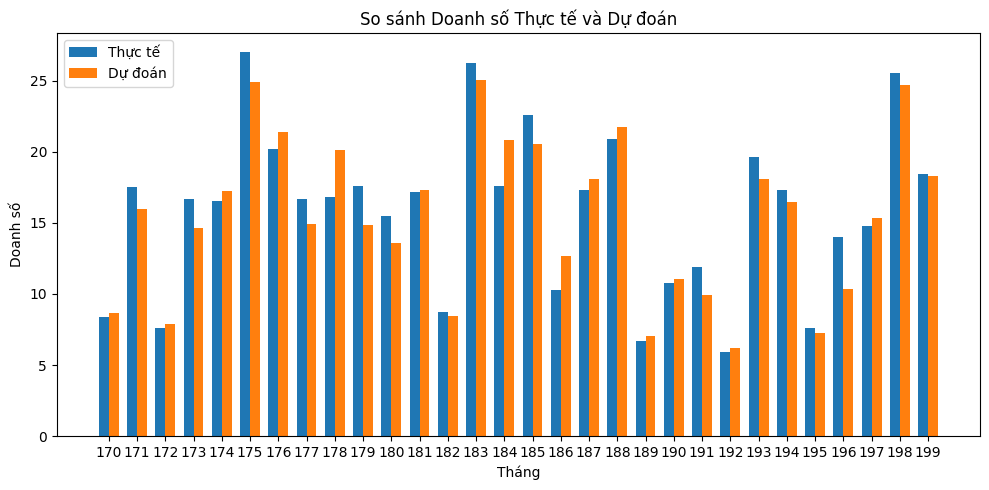

In [33]:
#7.Truc quan hoa ket qua du doan bang bieu do
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
bar_width = 0.35
index = np.arange(len(df_MonthData))
plt.figure(figsize=(10, 5))
plt.bar(index, df_MonthData["Sales"], bar_width, label="Thực tế")
plt.bar(index + bar_width, df_MonthData["DuDoan_Sales"], bar_width, label="Dự đoán")
plt.xlabel("Tháng")
plt.ylabel("Doanh số")
plt.title("So sánh Doanh số Thực tế và Dự đoán")
plt.xticks(index + bar_width / 2, df_MonthData.index)
plt.legend()
plt.tight_layout()
plt.show()